# To Start!

We first import the packages that we will be using. 

We need pandas to work on our data, matplotlib pyplot for visualizations, numpy for array calculations, and finally networkx for all our graph networks.

In [101]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numba import njit
import random
import pandas as pd

Next, we grab the static gtfs rail text files and read them into dataframes.

In [102]:
trips = pd.read_csv('../gtfs_rail/trips.txt')
stops = pd.read_csv('../gtfs_rail/stops.txt')

Let us see what we have. We check which stops are on the 4th line.

In [103]:
stops[stops["stop_id"].str[:3] == "804"]

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,stop_url,location_type,parent_station,tpis_name
289,80401,80401,Atlantic Station,NaN,34.033398,-118.154469,NaN,0,80401S,East LA
290,80401S,80401S,Atlantic Station,NaN,34.033398,-118.154469,NaN,1,NaN,NaN
291,80401A,80401A,Atlantic Station - Pomona & Atlantic Entrance,NaN,34.033370,-118.152950,NaN,2,80401S,NaN
292,80401B,80401B,Atlantic Station - Pomona & Beverly Entrance,NaN,34.033420,-118.155310,NaN,2,80401S,NaN
293,80402,80402,East LA Civic Center Station,NaN,34.033364,-118.161206,NaN,0,80402S,ELACC
...,...,...,...,...,...,...,...,...,...,...
384,80426A,80426A,Azusa Downtown Station - Azusa Avenue Entrance...,NaN,34.135710,-117.907410,NaN,2,80426S,NaN
385,80426B,80426B,Azusa Downtown Station - Azusa Avenue Entrance...,NaN,34.135440,-117.907410,NaN,2,80426S,NaN
386,80427,80427,APU / Citrus College Station,NaN,34.136814,-117.891636,NaN,0,80427S,Azusa
387,80427S,80427S,APU / Citrus College Station,NaN,34.136814,-117.891636,NaN,1,NaN,NaN


# Cleaning the Data

Ok, so we really need to clean this data up. We remove all stops that are not part of the LA Metro rail lines (ie fake stop data) and we only want the main stop for each station.

In [104]:
stops = stops[stops["stop_id"].str[:3] < "810"]
stops = stops[stops["location_type"] == 0]

We can look at our data now!

In [105]:
stops

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,stop_url,location_type,parent_station,tpis_name
0,80101,80101,Downtown Long Beach Station,NaN,33.768071,-118.192921,NaN,0,80101S,Long Bch
4,80102,80102,Pacific Ave Station,NaN,33.772258,-118.193700,NaN,0,80102S,Pacific
8,80105,80105,Anaheim Street Station,NaN,33.781830,-118.189384,NaN,0,80105S,Anaheim
12,80106,80106,Pacific Coast Hwy Station,NaN,33.789090,-118.189382,NaN,0,80106S,PCH
15,80107,80107,Willow Street Station,NaN,33.807079,-118.189834,NaN,0,80107S,Willow
...,...,...,...,...,...,...,...,...,...,...
403,80705,80705,Fairview Heights Station,NaN,33.975252,-118.336072,NaN,0,80705S,Fairview
407,80706,80706,Hyde Park Station,NaN,33.988187,-118.330816,NaN,0,80706S,Hyde Park
411,80707,80707,Leimert Park Station,NaN,34.003909,-118.332016,NaN,0,80707S,Leimert
415,80708,80708,Martin Luther King Jr Station,NaN,34.009563,-118.335359,NaN,0,80708S,MLK


# Creating the Graph

Now we can use networkx package to create graph objects. We will be using the graph object to create calculations. We will create a simple graph for now.

First, we make simple function to turn lists of strings into int.

In [106]:
def to_int(l):
    """
    Simple function that takes in a list of strings and returns a string of integers
    """
    return [int(i) for i in l]

In [107]:
# Creating our graph
rail_network = nx.Graph()

# Node List
# Get all stop IDs and put in list
NL = stops["stop_id"].tolist()
# Cast all IDs to int type
NL = [int(i) for i in NL]
# Add node list NL as nodes to our graph
rail_network.add_nodes_from(NL)

# Edges List
# Empty list
EL = []
# Loop through our sorted stops
for i in range(len(stops)-1):
    # Grab the IDs of each stop and consecutive stop
    stop_id_1 = int(stops["stop_id"].iloc[[i]])
    stop_id_2 = int(stops["stop_id"].iloc[[i+1]])
    
    # Append the stop tuple if they are next to each other on the line
    if stop_id_1+1 == stop_id_2:
        EL.append((stop_id_1, stop_id_2))
        
# We find the intersection stops
intersection1 = stops[stops["stop_name"].str[:10] == "7th Street"]["stop_code"].tolist()
intersection1 = to_int(intersection1)
intersection2 = stops[stops["stop_name"].str[:10] == "Willowbroo"]["stop_code"].tolist()
intersection2 = to_int(intersection2)
intersection3 = stops[stops["stop_name"].str[:10] == "Union Stat"]["stop_code"].tolist()
intersection3 = to_int(intersection3)
intersection4 = stops[stops["stop_name"].str[:10] == "Expo / Cre"]["stop_code"].tolist()
intersection4 = to_int(intersection4)
# Append the intersection stops
EL.append((intersection1[0], intersection1[1]))
EL.append((intersection2[0], intersection2[1]))
EL.append((intersection3[0], intersection3[1]))
EL.append((intersection4[0], intersection4[1]))

# Extra missed connections
EL.append((80154, 80105))
# Add edge list to graph
rail_network.add_edges_from(EL)


# Visualization Time!

Let's see what our graph looks like.

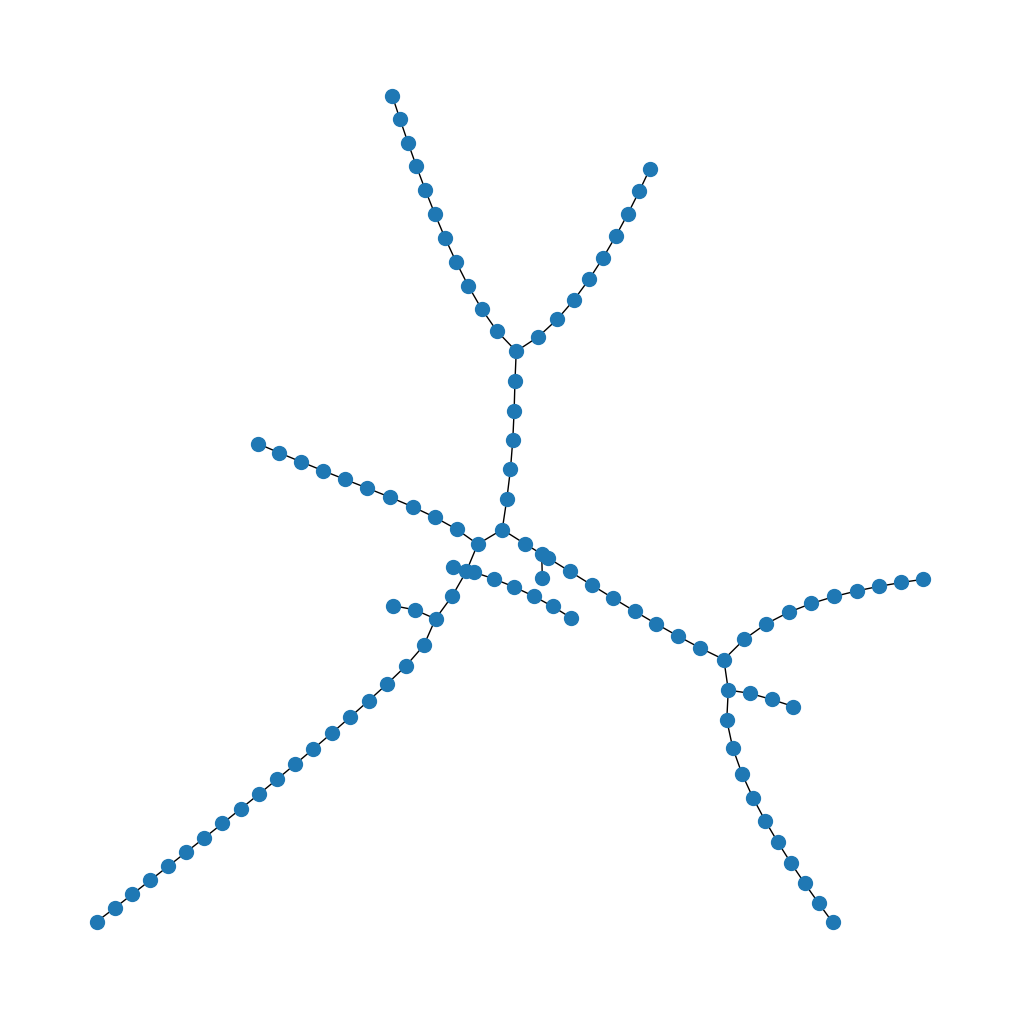

In [108]:
# Set figure size
fig = plt.figure(figsize = (10,10))
# We use Kamada-Kawai positioning algorithm to plot the nodes of the graph
nx.draw_kamada_kawai(rail_network, with_labels=False, node_size=100)

In [109]:
'''
I try to draw each line by itself, but it isnt really working... WIP i guess


fig = plt.figure(figsize = (10,10))

for i in range(7):
    plt.subplot(7,1,i+1)
    nodes = [j for j in NL if str(j)[0:3] == f"80{i+1}"]
    print(nodes)
    nx.draw_kamada_kawai(train_network, nodelist = nodes, with_labels=True, node_size=100)
    plt.xlabel(f"Line {i+1}")

plt.show()
'''

'\nI try to draw each line by itself, but it isnt really working... WIP i guess\n\n\nfig = plt.figure(figsize = (10,10))\n\nfor i in range(7):\n    plt.subplot(7,1,i+1)\n    nodes = [j for j in NL if str(j)[0:3] == f"80{i+1}"]\n    print(nodes)\n    nx.draw_kamada_kawai(train_network, nodelist = nodes, with_labels=True, node_size=100)\n    plt.xlabel(f"Line {i+1}")\n\nplt.show()\n'

# Analysis of Simple Graph

We can proceed to do some simple mathematical analysis such as centrality and modularity on our graph. 

We use Katz centrality in this case:

In [110]:
k_centralities = nx.katz_centrality(rail_network, max_iter = 1000)
sorted_k_centralities = sorted(k_centralities.items(), key=lambda x:x[1], reverse=True)
sorted_k_centralities

[(80211, 0.10964996912465572),
 (80122, 0.10964057971843413),
 (80112, 0.10963844722310755),
 (80311, 0.10962914524005822),
 (80128, 0.10860213703445747),
 (80214, 0.10851121662025282),
 (80212, 0.0996824752074115),
 (80210, 0.09958096249139052),
 (80123, 0.09958011929095595),
 (80121, 0.09958001438314922),
 (80113, 0.09957980078707426),
 (80111, 0.09957980070831464),
 (80213, 0.09957895695656277),
 (80310, 0.0995788614999098),
 (80312, 0.0994784041627253),
 (80127, 0.09947523550590821),
 (80129, 0.09947512012307273),
 (80709, 0.09947512004431311),
 (80409, 0.09946593557060888),
 (80124, 0.09856475719081569),
 (80209, 0.0985637968748341),
 (80120, 0.09856370181197921),
 (80114, 0.09856368070440248),
 (80110, 0.0985636796805275),
 (80309, 0.09856358611410528),
 (80126, 0.09855427271091184),
 (80130, 0.09855311029775904),
 (80708, 0.09855310935264366),
 (80410, 0.09855218250949832),
 (80125, 0.09847150116023821),
 (80215, 0.09847139530731612),
 (80208, 0.09846104731782448),
 (80119, 0.09

In [111]:
(station for station,centrality in sorted_k_centralities)

<generator object <genexpr> at 0x0000021D4BA56EA0>

In [112]:
labels_high_centrality

{80211: 80211, 80122: 80122, 80112: 80112, 80311: 80311, 80128: 80128}

{80214: Text(-0.20079330718192953, -0.10754573122354516, '80214'),
 80212: Text(-0.1281620106999731, -0.009949115587035507, '80212'),
 80210: Text(-0.14992560086197476, 0.07625760865917434, '80210'),
 80123: Text(-0.03246334170100554, 0.1391720737070623, '80123'),
 80121: Text(0.011356986992349933, 0.046159705959776295, '80121')}

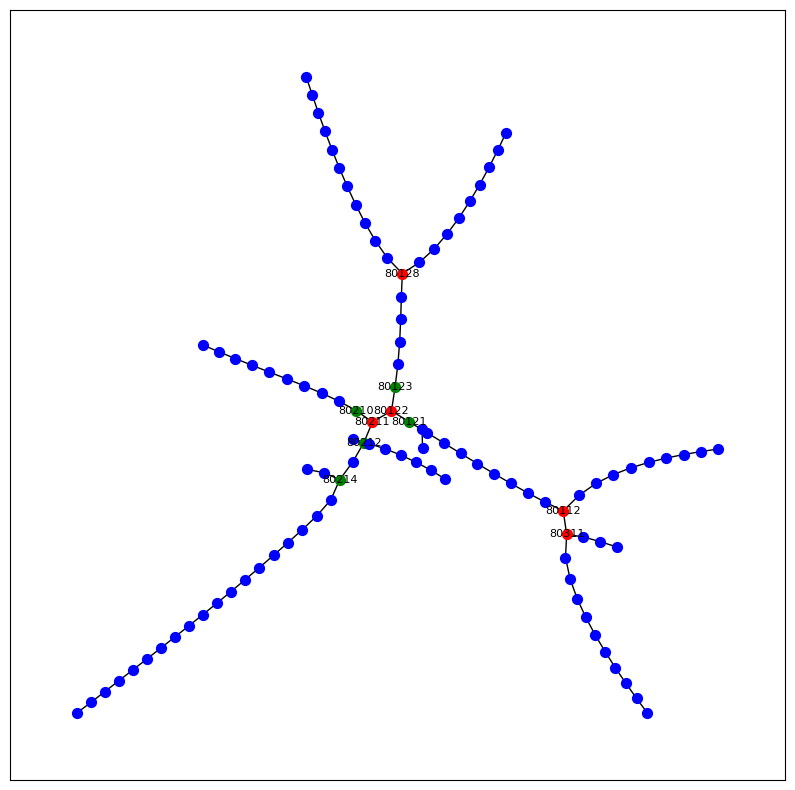

In [113]:
# proof of concept for coloring nodes
# later we can split into bins

# Get the top 5 stations
high_centrality = [station for station,centrality in sorted_k_centralities][:5]
labels_high_centrality = {}    
for node in high_centrality:
    #set the node name as the key and the label as its value 
    labels_high_centrality[node] = node
# Next highest
next_high_centrality = [station for station,centrality in sorted_k_centralities][5:10]
labels_next_high_centrality = {}    
for node in next_high_centrality:
    #set the node name as the key and the label as its value 
    labels_next_high_centrality[node] = node

# remaining stations
remaining_nodes = list(set(rail_network.nodes()) - set(high_centrality) - set(next_high_centrality))

fig = plt.figure(figsize=(10, 10))
layout = nx.kamada_kawai_layout(rail_network)
nx.draw_networkx_nodes(rail_network, layout, labels_high_centrality, node_color='red', node_size=50)
nx.draw_networkx_nodes(rail_network, layout, labels_next_high_centrality, node_color='green', node_size=50)
nx.draw_networkx_nodes(rail_network, layout, nodelist=remaining_nodes, node_color='blue', node_size=50)
nx.draw_networkx_edges(rail_network, layout)
nx.draw_networkx_labels(rail_network, layout, labels_high_centrality, font_size=8)
nx.draw_networkx_labels(rail_network, layout, labels_next_high_centrality, font_size=8)


In [114]:
count_tuples=dict()
#using for loop to iterate every value in Input
for i in EL:
    for j in i:
      if j not in count_tuples:   #checking if element i present in dictionary  or not
        count_tuples[j]=1
      else:
        count_tuples[j]+=1
#printing dictionary  of elements and their count
sorted_count_tuples = sorted(count_tuples.items(), key=lambda x:x[1], reverse=True)
sorted_count_tuples

[(80112, 3),
 (80122, 3),
 (80128, 3),
 (80211, 3),
 (80214, 3),
 (80311, 3),
 (80105, 2),
 (80106, 2),
 (80107, 2),
 (80108, 2),
 (80109, 2),
 (80110, 2),
 (80111, 2),
 (80113, 2),
 (80114, 2),
 (80115, 2),
 (80116, 2),
 (80117, 2),
 (80118, 2),
 (80119, 2),
 (80120, 2),
 (80121, 2),
 (80123, 2),
 (80124, 2),
 (80125, 2),
 (80126, 2),
 (80127, 2),
 (80129, 2),
 (80130, 2),
 (80131, 2),
 (80132, 2),
 (80133, 2),
 (80134, 2),
 (80135, 2),
 (80136, 2),
 (80137, 2),
 (80138, 2),
 (80154, 2),
 (80202, 2),
 (80203, 2),
 (80204, 2),
 (80205, 2),
 (80206, 2),
 (80207, 2),
 (80208, 2),
 (80209, 2),
 (80210, 2),
 (80212, 2),
 (80213, 2),
 (80215, 2),
 (80302, 2),
 (80303, 2),
 (80304, 2),
 (80305, 2),
 (80306, 2),
 (80307, 2),
 (80308, 2),
 (80309, 2),
 (80310, 2),
 (80312, 2),
 (80313, 2),
 (80402, 2),
 (80403, 2),
 (80404, 2),
 (80405, 2),
 (80406, 2),
 (80409, 2),
 (80410, 2),
 (80411, 2),
 (80412, 2),
 (80413, 2),
 (80414, 2),
 (80415, 2),
 (80416, 2),
 (80417, 2),
 (80418, 2),
 (80419, 2),

We can also see how modular our network is so far:

In [115]:
# Make list of stop IDs
stop_id_list = stops["stop_id"].tolist()
stop_id_list = to_int(stop_id_list)

# Make groups of IDs for each route
# Let us use a function
def route_id(i, station_list = stop_id_list):
    """
    Function that returns list of ID's given input route ID number
    """
    return [j for j in station_list if str(j)[0:3] == f"80{i}"]

# Create groups for each of our routes
route_A = route_id(1)
route_B = route_id(2)
route_C = route_id(3)
route_E = route_id(4)
route_K = route_id(7)
route_D = route_id(5)

# A list of all our groups!
route_groups = [route_A, route_B, route_C, route_E, route_K, route_D]

In [116]:
# Using our networkx function
nx.community.modularity(rail_network, route_groups)

0.7062052739927459

Our graph is really quite modular. This means that rail lines do not intersect with each other all that often in LA.

# Future Work:

We will be scraping websites and using API calls to get the needed real time and historical data for the LA rail lines to understand the congestion and how the dynamics of the network changes throughout time. We can even look at holiday rushes etc. We also plan on creating a geographical visualization and visualizing this network and ridership. We will be implementing our findings into an easy to use web app.

# Ok Future Work TIME !

Let's figure out most influential spreaders with a recursive formula over target nodes.

First, we must decide which nodes are the most important to us.

In [117]:
stops
# https://transitism.wordpress.com/2015/05/30/la-metro-rail-ridership-breakdown-2014/
# https://thesource.metro.net/2013/07/15/2012-ridership-visualized/
# https://urbanone.com/population-employment-los-angeles-metro-stations

# Busiest Stations
# 7th Street / Metro - 80122
# Union Station - 80214
# Culver City Station - 80132
# North Hollywood Station - 80201
# Wilshire / Vermont - 80209


# Concert/Stadium cluster of nodes (Crypto arena, stadiums near USC, dodger stadium)
# Pico - 80121
# Expo Park / USC - 80125
# Union Station - 80214


,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,stop_url,location_type,parent_station,tpis_name
0,80101,80101,Downtown Long Beach Station,NaN,33.768071,-118.192921,NaN,0,80101S,Long Bch
4,80102,80102,Pacific Ave Station,NaN,33.772258,-118.193700,NaN,0,80102S,Pacific
8,80105,80105,Anaheim Street Station,NaN,33.781830,-118.189384,NaN,0,80105S,Anaheim
12,80106,80106,Pacific Coast Hwy Station,NaN,33.789090,-118.189382,NaN,0,80106S,PCH
15,80107,80107,Willow Street Station,NaN,33.807079,-118.189834,NaN,0,80107S,Willow
...,...,...,...,...,...,...,...,...,...,...
403,80705,80705,Fairview Heights Station,NaN,33.975252,-118.336072,NaN,0,80705S,Fairview
407,80706,80706,Hyde Park Station,NaN,33.988187,-118.330816,NaN,0,80706S,Hyde Park
411,80707,80707,Leimert Park Station,NaN,34.003909,-118.332016,NaN,0,80707S,Leimert
415,80708,80708,Martin Luther King Jr Station,NaN,34.009563,-118.335359,NaN,0,80708S,MLK


In [118]:
# Busiest Stations
print(f"7th Street / Metro - 80122, index {NL.index(80122)}")
print(f"Union Station - 80214, index {NL.index(80214)}")
print(f"Culver City Station - 80132, index {NL.index(80132)}")
print(f"North Hollywood Station - 80201, index {NL.index(80201)}")
print(f"Wilshire / Vermont - 80209, index {NL.index(80209)}")
busy_station_ids = [80122, 80214, 80132, 80201, 80209]

# Concert/Stadium cluster of nodes (Crypto arena, stadiums near USC, dodger stadium)
print(f"Pico - 80121, index {NL.index(80121)}")
print(f"Expo Park / USC - 80125, index {NL.index(80125)}")
print(f"Union Station - 80214, index {NL.index(80214)}")
Destination_station_ids = [80121, 80125, 80214]

7th Street / Metro - 80122, index 19
Union Station - 80214, index 52
Culver City Station - 80132, index 29
North Hollywood Station - 80201, index 39
Wilshire / Vermont - 80209, index 47
Pico - 80121, index 18
Expo Park / USC - 80125, index 22
Union Station - 80214, index 52


Formula from paper https://www.nature.com/articles/srep38865#citeas

In [119]:
def station_id_to_index(station_id_list):
    """
    Will get a list of the indices of your stations in the node list
    :param station_id_list: the stop id of your stations
    :return: the list of the indices correlated with the stop id in node list
    """
    NL_indices = []

    for id in station_id_list:
        NL_indices.append((id, NL.index(id)))

    return NL_indices


def index_to_station_id(index_list):
    """
    Will get a list of the station id of your index in the node list
    :param index_list: the list of indices
    :return: the list of station id's correlated to node list
    """
    station_list = []

    for i in index_list:
        station_list.append(NL[i])

    return station_list


def rlp(f, adjacency, epsilon, max_l=3):
    """
    Implementing the RLP algorithm into python
    :param f: 1xN vector, components corresponding to target nodes are 1 and 0 otherwise
    :param adjacency: NxN adjacecny matrix of our network
    :param epsilon: tunable parameter controlling weight of the paths with different lengths
    :param max_l: furthest nodes we consider
    :return: 1xN vector that ranks the importance of nodes on our network
    """
    s_rlp = np.zeros(len(f))

    for l in range(0, max_l):
        summation_iteration = np.power(epsilon, l) * f @ np.linalg.matrix_power(adjacency, l + 1)
        s_rlp = np.add(s_rlp, summation_iteration)

    return s_rlp


def get_ranked_stations(array):
    """
    Take the ranking and convert the numbers to stations
    :param array: the calculated stations
    :return: the station's that are important
    """

    def merge(list1, list2):
        merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
        return merged_list

    indices = list(np.nonzero(array)[1])

    values = []
    for i in indices:
        values.append(array[0][i])

    stations = index_to_station_id(indices)

    # Create list of tuples (station, value of station)
    merged = merge(stations, values)
    # Sort on values
    merged.sort(key=lambda x: x[1], reverse = True)

    # Grab first element of each tuple
    station_sorted = (list(zip(*merged))[0])

    return station_sorted
    

In [120]:
# testing
'''
arr = rlp(f, A_busy, epsilon, 3)
index_to_station_id(list(np.nonzero(arr)[1]))

get_ranked_stations(arr)
'''

'\narr = rlp(f, A_busy, epsilon, 3)\nindex_to_station_id(list(np.nonzero(arr)[1]))\n\nget_ranked_stations(arr)\n'

In [121]:
# First for 5 busiest stations

# get f
f = np.zeros((1,len(NL)))
busy_station_indices = station_id_to_index(busy_station_ids)
for i in busy_station_indices:
    f[0][i[1]] = 1
    
# Get adjacency matrix
A_busy = nx.adjacency_matrix(rail_network)
A_busy = A_busy.toarray()

# epsilon
epsilon = 0.1


# Calculate
get_ranked_stations(rlp(f, A_busy, epsilon, 3))

(80211,
 80210,
 80213,
 80121,
 80123,
 80215,
 80409,
 80131,
 80133,
 80208,
 80202,
 80122,
 80214,
 80209,
 80212,
 80132,
 80120,
 80124,
 80130,
 80134,
 80201,
 80203,
 80207,
 80216,
 80410,
 80119,
 80125,
 80129,
 80135,
 80204,
 80206,
 80411)

In [122]:
# Now for Concert/Stadium Stations

# get f
f = np.zeros((1,len(NL)))
busy_station_indices = station_id_to_index(Destination_station_ids)
for i in busy_station_indices:
    f[0][i[1]] = 1
    
# Get adjacency matrix
A_stadium = nx.adjacency_matrix(rail_network)
A_stadium = A_stadium.toarray()

# epsilon
epsilon = 0.1


# Calculate
get_ranked_stations(rlp(f, A_stadium, epsilon, 3))

(80122,
 80124,
 80213,
 80215,
 80409,
 80120,
 80126,
 80214,
 80121,
 80123,
 80125,
 80211,
 80212,
 80119,
 80127,
 80216,
 80410,
 80118,
 80128,
 80210,
 80411)

In [123]:
index_checking = station_id_to_index([80122])[0][1]
rlp(f, A_stadium, epsilon, 3)[0,index_checking]

1.05

In [124]:
print(index_to_station_id([76]))
print(station_id_to_index([80411])[0][1])

[80409]
78


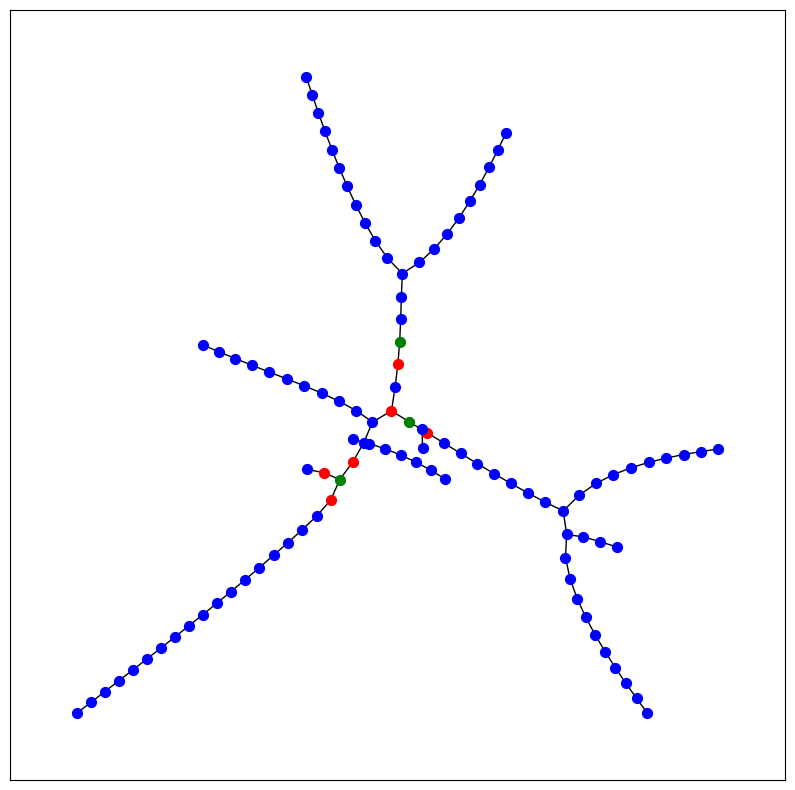

In [125]:
# proof of concept for coloring nodes
# later we can split into bins

# Get the top 6 stations
important_stations = list(get_ranked_stations(rlp(f, A_stadium, epsilon, 3)))[:6]
# The Stations we care about
Destination_station_ids
# remaining stations
remaining_nodes = list(set(rail_network.nodes()) - set(important_stations) - set(Destination_station_ids))

fig = plt.figure(figsize=(10, 10))
layout = nx.kamada_kawai_layout(rail_network)
nx.draw_networkx_nodes(rail_network, layout, nodelist=important_stations, node_color='red', node_size=50)
nx.draw_networkx_nodes(rail_network, layout, nodelist=Destination_station_ids, node_color='green', node_size=50)
nx.draw_networkx_nodes(rail_network, layout, nodelist=remaining_nodes, node_color='blue', node_size=50)
nx.draw_networkx_edges(rail_network, layout)

# Weighing Graph


In [126]:
A_ridership_df_jan = pd.read_csv('../sreejeet_testing/gvRailBlueJanuary2023.csv')
A_ridership_df_feb = pd.read_csv('../sreejeet_testing/gvRailBlueFebruary2023.csv')
A_ridership_df_march = pd.read_csv('../sreejeet_testing/gvRailBlueMarch2023.csv')

E_ridership_df_jan = pd.read_csv('../sreejeet_testing/gvRailExpoJanuary2023.csv')
E_ridership_df_feb = pd.read_csv('../sreejeet_testing/gvRailExpoFebruary2023.csv')
E_ridership_df_march = pd.read_csv('../sreejeet_testing/gvRailExpoMarch2023.csv')

C_ridership_df_jan = pd.read_csv('../sreejeet_testing/gvRailGreenJanuary2023.csv')
C_ridership_df_feb = pd.read_csv('../sreejeet_testing/gvRailGreenFebruary2023.csv')
C_ridership_df_march = pd.read_csv('../sreejeet_testing/gvRailGreenMarch2023.csv')

B_ridership_df_jan = pd.read_csv('../sreejeet_testing/gvRailRedJanuary2023.csv')
B_ridership_df_feb = pd.read_csv('../sreejeet_testing/gvRailRedFebruary2023.csv')
B_ridership_df_march = pd.read_csv('../sreejeet_testing/gvRailRedMarch2023.csv')

list_of_df = [A_ridership_df_jan, A_ridership_df_feb, A_ridership_df_march, 
              E_ridership_df_jan, E_ridership_df_feb, E_ridership_df_march,
              C_ridership_df_jan, C_ridership_df_feb, C_ridership_df_march,
              B_ridership_df_jan, B_ridership_df_feb, B_ridership_df_march]

In [127]:
A_ridership_df_march

,Boarding Category,MAR 2023,MAR 2022,MAR 2021
0,Average Weekday Boardings,"31,752","35,765","24,143"
1,Average Saturday Boardings,"22,095","22,644","19,940"
2,Average Sunday and Holiday Boardings,"18,761","19,338","14,885"
3,Total Boardings,"893,720","990,523","694,589"
4,Proportion of Total Boardings,0.1756569002410241,0.1797977707772329,0.19876065930292452


In [128]:
boarding_proportions_l = []
for df in list_of_df:
    new_df = df.set_index('Boarding Category')
    if new_df.columns[1][:3] == 'JAN':
        month = 'JAN'
    elif new_df.columns[1][:3] == 'FEB':
        month = 'FEB'
    elif new_df.columns[1][:3] == 'MAR':
        month = 'MAR'
    boarding_proportions_l.append(float(new_df.loc['Proportion of Total Boardings'][f'{month} 2023']))
    boarding_proportions_l.append(float(new_df.loc['Proportion of Total Boardings'][f'{month} 2022']))
    boarding_proportions_l.append(float(new_df.loc['Proportion of Total Boardings'][f'{month} 2021']))
    

total_avg = sum(boarding_proportions_l)/len(boarding_proportions_l)
A_avg = sum(boarding_proportions_l[:9])/9
E_avg = sum(boarding_proportions_l[9:18])/9
C_avg = sum(boarding_proportions_l[18:27])/9
BD_avg = sum(boarding_proportions_l[27:36])/9
print(total_avg, A_avg, BD_avg, C_avg, E_avg)

0.2236541778304061 0.18821043586210767 0.4542520770906727 0.09190182271035814 0.1602523756584857


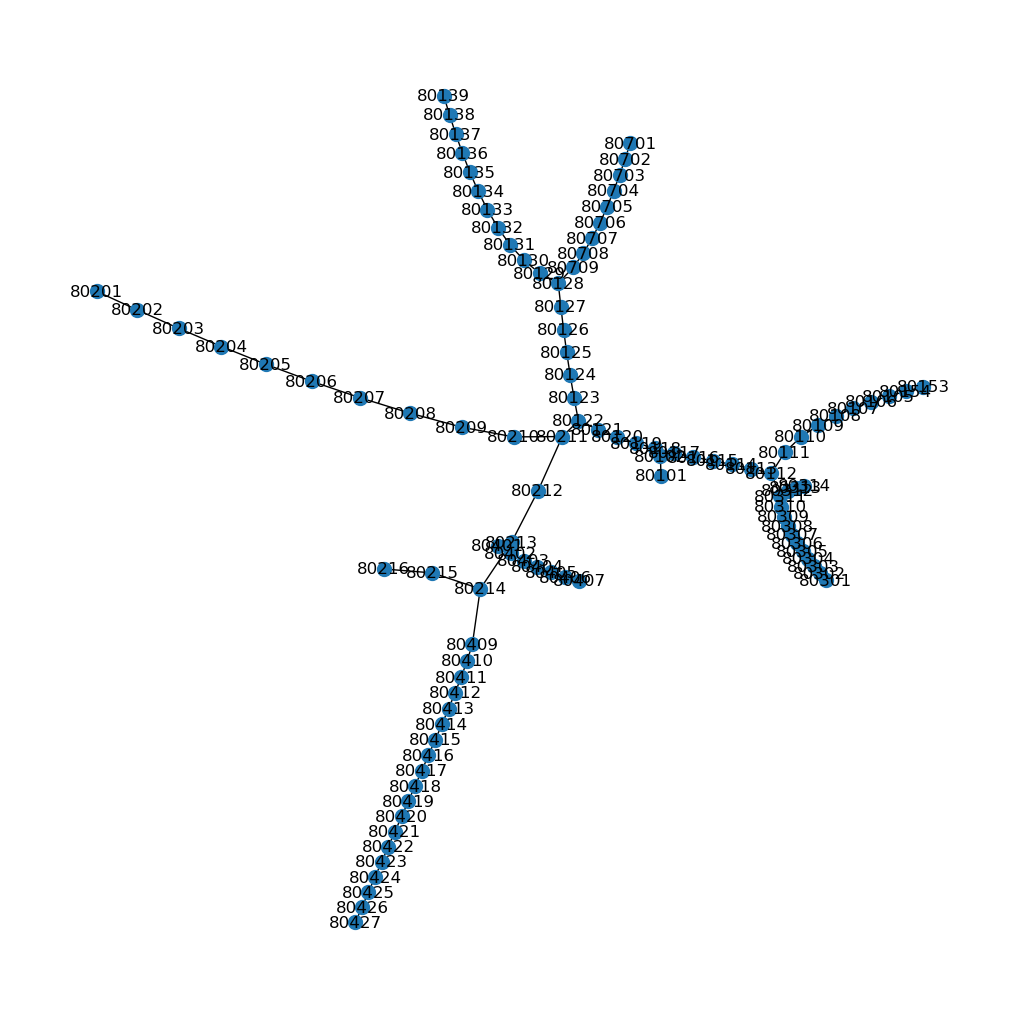

In [129]:
network2 = nx.Graph()
network2.add_nodes_from(rail_network)

for node1, node2 in rail_network.edges:
    if node1 in route_A:
        network2.add_edge(node1, node2, weight = A_avg)
    elif node1 in route_B:
        network2.add_edge(node1, node2, weight = BD_avg)
    elif node1 in route_C:
        network2.add_edge(node1, node2, weight = C_avg)
    elif node1 in route_E:
        network2.add_edge(node1, node2, weight = E_avg)
    elif node1 in route_D:
        network2.add_edge(node1, node2, weight = BD_avg)
    else:
        network2.add_edge(node1, node2, weight = 0.7*total_avg)
        
# Set figure size
fig = plt.figure(figsize = (10,10))
# We use Kamada-Kawai positioning algorithm to plot the nodes of the graph
nx.draw_kamada_kawai(network2, with_labels=True, node_size=100)

In [131]:
network2.edges(data = True)

EdgeDataView([(80101, 80102, {'weight': 0.18821043586210767}), (80105, 80106, {'weight': 0.18821043586210767}), (80105, 80154, {'weight': 0.18821043586210767}), (80106, 80107, {'weight': 0.18821043586210767}), (80107, 80108, {'weight': 0.18821043586210767}), (80108, 80109, {'weight': 0.18821043586210767}), (80109, 80110, {'weight': 0.18821043586210767}), (80110, 80111, {'weight': 0.18821043586210767}), (80111, 80112, {'weight': 0.18821043586210767}), (80112, 80113, {'weight': 0.18821043586210767}), (80112, 80311, {'weight': 0.18821043586210767}), (80113, 80114, {'weight': 0.18821043586210767}), (80114, 80115, {'weight': 0.18821043586210767}), (80115, 80116, {'weight': 0.18821043586210767}), (80116, 80117, {'weight': 0.18821043586210767}), (80117, 80118, {'weight': 0.18821043586210767}), (80118, 80119, {'weight': 0.18821043586210767}), (80119, 80120, {'weight': 0.18821043586210767}), (80120, 80121, {'weight': 0.18821043586210767}), (80121, 80122, {'weight': 0.18821043586210767}), (80122

# Normalizing Graph


In [132]:
def normalize_graph(G):
    # Get list of old edge weights
    old_edge_weights = [data['weight'] for node1, node2, data in G.edges(data=True)]
    # Calculate mean of old edge weights
    mean_old_edge_weights = sum(old_edge_weights) / len(old_edge_weights)

    # importing Statistics module
    import statistics
    # Calculate standard deviation of old edge weights
    stdev_old_edge_weights = statistics.stdev(old_edge_weights)

    # Create new graph we will add edges to 
    new_G = nx.Graph()
    new_G.add_nodes_from(list(G))
    for node1, node2, data in G.edges(data=True):
        # Z-score
        std_weight = (data['weight'] - mean_old_edge_weights) / stdev_old_edge_weights
        # New standard deviation of: std_weight/5
        std_weight = std_weight / 5
        # New mean of 1
        std_weight = std_weight + 1

        # if less than 0, turn to 0
        if std_weight < 0:
            std_weight = 0

        # Add new weights to new graph
        new_G.add_edge(node1, node2, weight=std_weight)

    return new_G


In [133]:
# Create Graph
network3 = normalize_graph(network2)
# Let's see if it worked
network3.edges(data=True)

EdgeDataView([(80101, 80102, {'weight': 0.9629585706873602}), (80105, 80106, {'weight': 0.9629585706873602}), (80105, 80154, {'weight': 0.9629585706873602}), (80106, 80107, {'weight': 0.9629585706873602}), (80107, 80108, {'weight': 0.9629585706873602}), (80108, 80109, {'weight': 0.9629585706873602}), (80109, 80110, {'weight': 0.9629585706873602}), (80110, 80111, {'weight': 0.9629585706873602}), (80111, 80112, {'weight': 0.9629585706873602}), (80112, 80113, {'weight': 0.9629585706873602}), (80112, 80311, {'weight': 0.9629585706873602}), (80113, 80114, {'weight': 0.9629585706873602}), (80114, 80115, {'weight': 0.9629585706873602}), (80115, 80116, {'weight': 0.9629585706873602}), (80116, 80117, {'weight': 0.9629585706873602}), (80117, 80118, {'weight': 0.9629585706873602}), (80118, 80119, {'weight': 0.9629585706873602}), (80119, 80120, {'weight': 0.9629585706873602}), (80120, 80121, {'weight': 0.9629585706873602}), (80121, 80122, {'weight': 0.9629585706873602}), (80122, 80123, {'weight': 

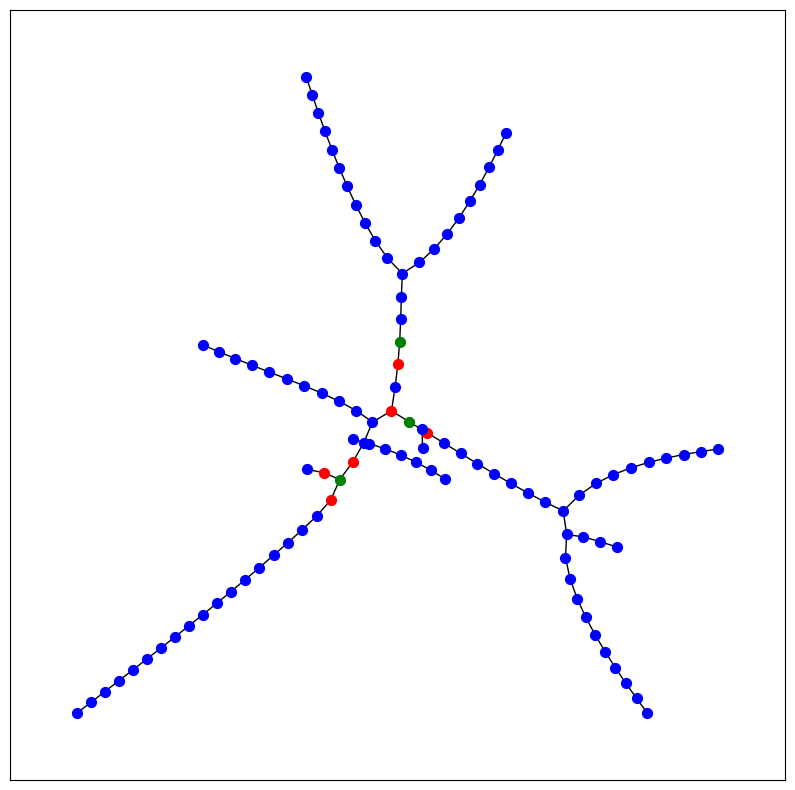

In [134]:
# proof of concept for coloring nodes
# later we can split into bins

# Get the top 6 stations
important_stations = list(get_ranked_stations(rlp(f, A_stadium, epsilon, 3)))[:6]
# The Stations we care about
Destination_station_ids
# remaining stations
remaining_nodes = list(set(rail_network.nodes()) - set(important_stations) - set(Destination_station_ids))

fig = plt.figure(figsize=(10, 10))
layout = nx.kamada_kawai_layout(rail_network)
nx.draw_networkx_nodes(rail_network, layout, nodelist=important_stations, node_color='red', node_size=50)
nx.draw_networkx_nodes(rail_network, layout, nodelist=Destination_station_ids, node_color='green', node_size=50)
nx.draw_networkx_nodes(rail_network, layout, nodelist=remaining_nodes, node_color='blue', node_size=50)
nx.draw_networkx_edges(rail_network, layout)